In [96]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta
import time
%matplotlib inline
from pathlib import Path 
import os
from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker

In [97]:
#Find yesterday's date and convert it to string
today=date.today()
yesterday=today-timedelta(days=1)
ydate=yesterday.strftime("%d-%m-%Y")

#Specify Data folder
data_folder = Path("../data")

#Compute filename
data_file = ydate + ".csv"

#Compute complete filepath for the day
file_path = data_folder / data_file

#Read file to data frame
df=pd.read_csv(file_path)

df['Date']= pd.to_datetime(df['Date'], dayfirst=True)
df=df[df['Date']!=today] #Drop today's data
df_h=df[df['Status']=='Hospitalized']
df_r=df[df['Status']=='Recovered']
df_d=df[df['Status']=='Deceased']

C:\Users\joses\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.


In [98]:
tamilnadu=df_h[df_h['State']=='Tamil Nadu']
tamilnadu=pd.DataFrame(tamilnadu.groupby(['Date', 'District'])['Num_Cases'].sum())
tamilnadu.rename(columns={'Num_Cases':'Daily New Cases'}, inplace=True)
dist_daily=tamilnadu.pivot_table(index='Date', columns='District', fill_value=0)
dist_daily.tail()

Daily New Cases                                           \
District   Airport Quarantine Ariyalur Chengalpattu Chennai Coimbatore   
Date                                                                     
2020-05-10                  0        4           43     509          0   
2020-05-11                  0       33           90     538          0   
2020-05-12                  4       36           35     510          0   
2020-05-13                  5        4           25     380          0   
2020-05-14                  0        0            9     363          0   

                                                                ...       \
District   Cuddalore Dharmapuri Dindigul Erode Kallakurichi     ...        
Date                                                            ...        
2020-05-10         1          0        0     0            0     ...        
2020-05-11         0          2        1     0            0     ...        
2020-05-12         1          0        2     0            2     ...        
2020-05-13        17          0        0     0            0     ...        
2020-05-14         0          0        1     0            0     ...        

                                                                           \
District   Thiruvarur Thoothukkudi Tiruchirappalli Tirunelveli Tirupathur   
Date                                                                        
2020-05-10          0            0               0          10          1   
2020-05-11          0            3               0           0          0   
2020-05-12          0            2               2           3          0   
2020-05-13          0            1               0           5          0   
2020-05-14          0            3               0          16          0   

                                                                    
District   Tiruppur Tiruvannamalai Vellore Viluppuram Virudhunagar  
Date                                                                
2020-05-10        0              0       3          6            2  
2020-05-11        0             10       1          0            1  
2020-05-12        0             13       1          1            4  
2020-05-13        0             23       0          7            0  
2020-05-14        0              8       0          0            0  

[5 rows x 38 columns]

In [99]:
#Create a time series for TN Districts by Cumulative Cases 
dist_cum=dist_daily.cumsum()
dist_cum.rename(columns={'Daily New Cases':'Cumulative Cases'}, inplace=True)
dist_cum.tail()

Cumulative Cases                                           \
District   Airport Quarantine Ariyalur Chengalpattu Chennai Coimbatore   
Date                                                                     
2020-05-10                  0      265          261    3834        146   
2020-05-11                  0      298          351    4372        146   
2020-05-12                  4      334          386    4882        146   
2020-05-13                  9      338          411    5262        146   
2020-05-14                  9      338          420    5625        146   

                                                                ...       \
District   Cuddalore Dharmapuri Dindigul Erode Kallakurichi     ...        
Date                                                            ...        
2020-05-10       394          4      107    70           55     ...        
2020-05-11       394          6      108    70           55     ...        
2020-05-12       395          6      110    70           57     ...        
2020-05-13       412          6      110    70           57     ...        
2020-05-14       412          6      111    70           57     ...        

                                                                           \
District   Thiruvarur Thoothukkudi Tiruchirappalli Tirunelveli Tirupathur   
Date                                                                        
2020-05-10         33           30              63          93         28   
2020-05-11         33           33              63          93         28   
2020-05-12         33           35              65          96         28   
2020-05-13         33           36              65         101         28   
2020-05-14         33           39              65         117         28   

                                                                    
District   Tiruppur Tiruvannamalai Vellore Viluppuram Virudhunagar  
Date                                                                
2020-05-10      114             83      33        308           40  
2020-05-11      114             93      34        308           41  
2020-05-12      114            106      35        309           45  
2020-05-13      114            129      35        316           45  
2020-05-14      114            137      35        316           45  

[5 rows x 38 columns]

In [100]:
#Arrange districts in descending order of latest cumulative Cases
trans=dist_cum.transpose()
sort_dist=pd.DataFrame(trans[yesterday].sort_values(ascending=False))
mylist=sort_dist.index.tolist() #Export to a list (Array of Cumulative Cases and District names)

In [101]:
dist_list=[row[1] for row in mylist]#Creates a new list from the array above and extracts only the district names
#Split the States into three different categories according to their rank
top10=dist_list[0:10] #Top 10 districts
second10=dist_list[10:20] #10-20 Districts
third10=dist_list[20:30] #20-30 districts
last=dist_list[30:]

In [102]:
#Select Top 10 Districts by Cumulative Cases
top10cum=pd.DataFrame()
for i in range(10):
    top10cum[top10[i]]=dist_cum['Cumulative Cases', top10[i]]
#top10cum.tail()

In [103]:
#Select the second 10 districts by Cumulative Cases
second10cum=pd.DataFrame()
for i in range(10):
    second10cum[second10[i]]=dist_cum['Cumulative Cases', second10[i]]
#second10cum.tail()

In [104]:
#Select Top 10 Districts by Daily New Cases
top10new=pd.DataFrame()
for i in range(10):
    top10new[top10[i]]=dist_daily['Daily New Cases', top10[i]]

In [105]:
#Select the second 10 Districts by Daily New Cases
second10new=pd.DataFrame()
for i in range(10):
    second10new[second10[i]]=dist_daily['Daily New Cases', second10[i]]

In [106]:
#Calculate 7-Day Rolling Average for Top 10 Districts
top10new7dra=pd.DataFrame()
for i in range(10):
    name=top10new.columns[i]
    top10new7dra[name]= top10new.iloc[:,i].rolling(window=7).mean()

In [107]:
top10new7dra2=pd.DataFrame()
for i in range(10):
    name=top10new7dra.columns[i]
    top10new7dra2[name]=top10new7dra.iloc[:,i]
top10new7dra2.reset_index(drop=True,inplace=True)

In [108]:
#Extract Data where average cases >5 (set range 1-6 to include all Districts)
top10new7dra_dat=pd.DataFrame()
for j in range(10):
    for i in range(60):
        if top10new7dra2.iloc[i,j] < 6.0:
            if top10new7dra2.iloc[i,j] > 1.0:
                name=top10new7dra2.columns[j]
                top10new7dra_dat[name]=top10new7dra2.iloc[i:,j]
                break
    continue
    
#Remove the date column and reset index
top10new7dra_dat.reset_index(drop=True,inplace=True)

#Remove NaN at top and align rows for different states
top10new7dra_dat2=pd.DataFrame()
for i in range(10):
    top10new7dra_dat[top10new7dra_dat.columns[i]].dropna(inplace=True)
    top10new7dra_dat[top10new7dra_dat.columns[i]].reset_index(drop=True,inplace=True)
    top10new7dra_dat2[top10new7dra_dat.columns[i]]=top10new7dra_dat[top10new7dra_dat.columns[i]]

# Top 11-20 Districts

In [109]:
#Calculate 7-Day Rolling Average for Top 11-20 States
second10new7dra=pd.DataFrame()
for i in range(10):
    name=second10new.columns[i]
    second10new7dra[name]= second10new.iloc[:,i].rolling(window=7).mean()

second10new7dra2=pd.DataFrame()
for i in range(10):
    name=second10new7dra.columns[i]
    second10new7dra2[name]=second10new7dra.iloc[:,i]
second10new7dra2.reset_index(drop=True,inplace=True)
    
#Extract Data where average cases >3 (set range 8-11 to include all states)
second10new7dra_dat=pd.DataFrame()
for j in range(10):
    for i in range(70):
        if second10new7dra2.iloc[i,j] < 3.0:
            if second10new7dra2.iloc[i,j] > 1.0:
                name=second10new7dra2.columns[j]
                second10new7dra_dat[name]=second10new7dra2.iloc[i:,j]
                break
    continue
    
#Remove the date column and reset index
second10new7dra_dat.reset_index(drop=True,inplace=True)

#Remove NaN at top and align rows for different states
second10new7dra_dat2=pd.DataFrame()
for i in range(10):
    second10new7dra_dat[second10new7dra_dat.columns[i]].dropna(inplace=True)
    second10new7dra_dat[second10new7dra_dat.columns[i]].reset_index(drop=True,inplace=True)
    second10new7dra_dat2[second10new7dra_dat.columns[i]]=second10new7dra_dat[second10new7dra_dat.columns[i]]

In [110]:
#Graph Starting date is 23rd April; Calculate number of days as integer
x=(today-date(2020,3,23)).days

In [111]:
#Daily New Cases for Tamilnadu
tn=df_h[df_h['State']=='Tamil Nadu']
tn_daily=pd.DataFrame(tn.groupby('Date')['Num_Cases'].sum())
tn_daily.rename(columns={'Num_Cases':'Daily New Cases'}, inplace=True)

In [112]:
#Calculate the 7 day Rolling Average for Daily New Cases in TN
tn_daily_7dra=pd.DataFrame()
tn_daily_7dra[tn_daily.columns[0]]=tn_daily.iloc[:,0].rolling(window=7).mean()

In [113]:
#Cumulative Cases for Tamilnadu
tn_cum=tn_daily.cumsum()
tn_cum.rename(columns={'Daily New Cases':'Cumulative Cases'}, inplace=True)

In [114]:
chart_folder= Path("../charts")
export_path=chart_folder/ydate
dist_path=export_path/"Districts"
try:
    os.mkdir(dist_path)
    print('New Directory Created for today')
except:
    print("Directory already exists")


New Directory Created for today


# Plots Start Here

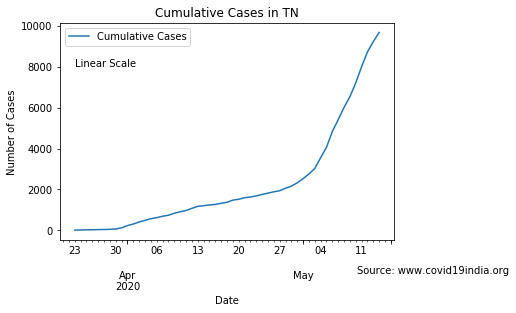

In [115]:
#Plot Cumulative Cases in TN as a linear plot
fig1_path=dist_path / "TN 1.jpg"
tn_cum.tail(x).plot(kind='line')
plt.title('Cumulative Cases in TN')
plt.text('23-03-2020',8000,"Linear Scale")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.savefig(fig1_path, dpi=300, bbox_inches='tight')
plt.show()

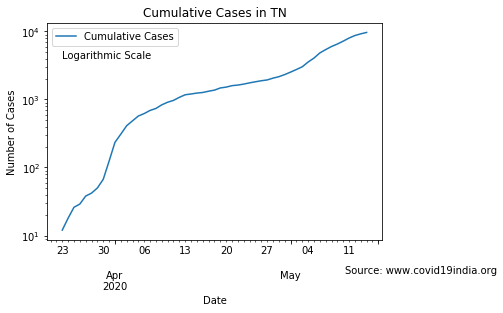

In [116]:
#Plot Cumulative Cases in TN as a log plot
fig2_path=dist_path / "TN 2.jpg"
tn_cum.tail(x).plot(kind='line').set_yscale('log')
plt.title('Cumulative Cases in TN')
plt.text('23-03-2020',4000,"Logarithmic Scale")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.savefig(fig2_path, dpi=300, bbox_inches='tight')
plt.show()

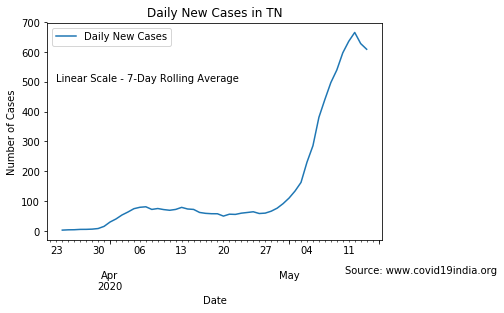

In [117]:
#Plot Daily New Cases in India (7DRA) as linear plot
fig3_path=dist_path / "TN 3.jpg"
tn_daily_7dra.tail(x).plot(kind='line')
plt.title('Daily New Cases in TN')
plt.text('23-03-2020',500,"Linear Scale - 7-Day Rolling Average")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.savefig(fig3_path, dpi=300, bbox_inches='tight')
plt.show()

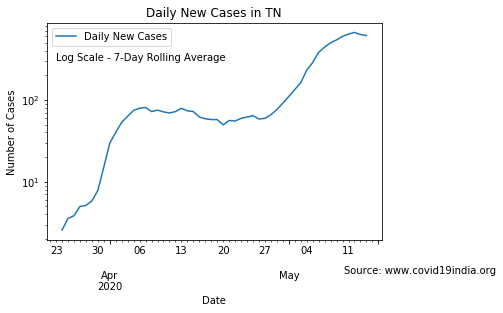

In [118]:
#Plot Daily New Cases in India (7DRA) as linear plot
fig4_path=dist_path / "TN 4.jpg"
tn_daily_7dra.tail(x).plot(kind='line').set_yscale('log')
plt.title('Daily New Cases in TN')
plt.text('23-03-2020',300,"Log Scale - 7-Day Rolling Average")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.savefig(fig4_path, dpi=300, bbox_inches='tight')
plt.show()

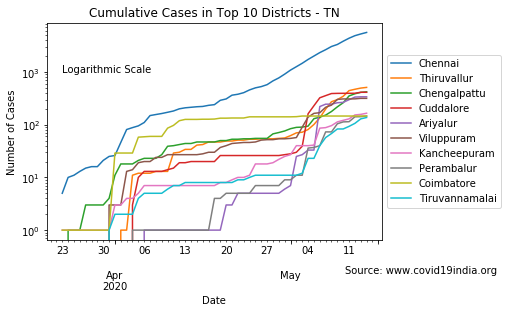

In [129]:
#Plot Top 10 States Cumulative Cases in Log Scale
fig5_path=dist_path / "TN 5.jpg"
top10cum.tail(x).plot(kind='line').set_yscale('log')
plt.title('Cumulative Cases in Top 10 Districts - TN')
plt.text('23-03-2020',1000,"Logarithmic Scale")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig(fig5_path,dpi=300, bbox_inches='tight')
plt.show()

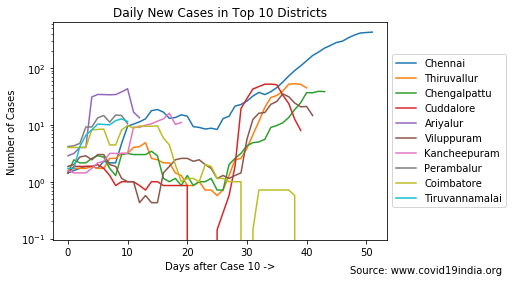

In [120]:
#Plot the 7DRA graph for Daily New Cases Day after case 10- Districts in Log Scale
fig6_path=dist_path / "TN 6.jpg"
top10new7dra_dat2.plot(kind='line').set_yscale('log')
plt.title('Daily New Cases in Top 10 Districts')
#plt.text(0,900,"Log Scale - 7-Day Rolling Average")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.xlabel('Days after Case 10 ->')
plt.ylabel('Number of Cases')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig(fig6_path,dpi=300, bbox_inches='tight')
plt.show()

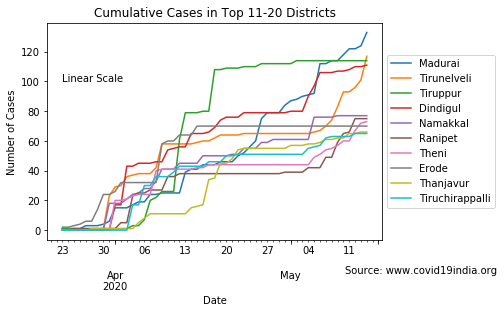

In [121]:
#Plot Top 11-20 Districts Cumulative Cases in Log Scale
fig7_path=dist_path / "TN 7.jpg"
second10cum.tail(x).plot(kind='line')#.set_yscale('log')
plt.title('Cumulative Cases in Top 11-20 Districts')
plt.text('23-03-2020',100,"Linear Scale")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig(fig7_path,dpi=300, bbox_inches='tight')
plt.show()

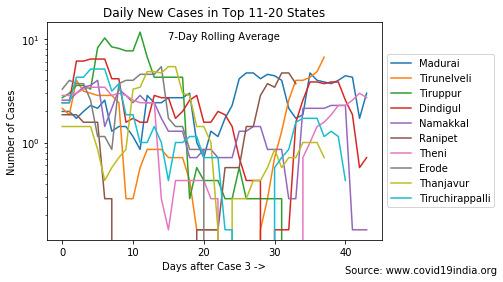

In [126]:
#Plot Top 11-20 Districts Daily New Cases in Log Scale
fig8_path=dist_path / "TN 8.jpg"
second10new7dra_dat2.plot(kind='line').set_yscale('log')
plt.title('Daily New Cases in Top 11-20 States')
#plt.text(0,1,"Logarithmic Scale")
plt.text(15,10,"7-Day Rolling Average")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.xlabel('Days after Case 3 ->')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig(fig8_path,dpi=300, bbox_inches='tight')
plt.show()